In [24]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
#import seaborn as sns
import pandas as pd
import numpy as np
import maboss
import time
import datetime
import glob
import os
import warnings

warnings.filterwarnings("ignore")

In [2]:
file = "data/model_files/PsoriaSys"

bnd_file = file+".bnd"
cfg_file = file+".cfg"
upp_file = file+"_200.upp"

model_Trigger = maboss.load(bnd_file,cfg_file)

sim_Trigger = maboss.UpdatePopulation(model_Trigger,upp_file)

In [3]:
# Uncomment to run the WT simulation or continue to upload the results

#res_init = sim_Trigger.run(cmaboss = True)
#table_init = res_init.get_nodes_stepwise_probability_distribution(['Prol_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th2', 'Th17', 'Th22', 'Treg', 'Fibroblast','ILC3'])

Untreated = pd.read_csv('output/Sensitivity_analysis/Untreated_all_cells.csv')
Untreated = Untreated.drop(Untreated.columns[0], axis=1)
Untreated = Untreated.add_prefix('Untreated-')
Untreated['Time'] = Untreated.index
Untreated.head()

,Untreated-PopRatio,Untreated-KC,Untreated-LC,Untreated-aKC,Untreated-Prol_KC,Untreated-Diff_KC,Untreated-preDiff_KC,Untreated-pDC,Untreated-iDC,Untreated-M1,Untreated-M2,Untreated-Neutrophil,Untreated-Th0,Untreated-Th1,Untreated-Th2,Untreated-Th17,Untreated-Th22,Untreated-Treg,Untreated-Fibroblast,Untreated-Division,Untreated-Death,Untreated-ILC3,Time
0,1.0,0.700425,0.428043,0.517708,0.0,0.001034,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.128292,0.0,0.0,0.0,0.0,0
1,1.0,0.696829,0.583964,0.769849,0.0,0.001944,0.0,0.000362,0.000366,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.116075,0.0,0.0,0.0,0.0,1
2,1.0,0.695275,0.659071,0.895939,0.0,0.003791,0.0,0.002784,0.002793,0.000000,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.115310,0.0,0.0,0.0,0.0,2
3,1.0,0.687397,0.695451,0.952166,0.0,0.004091,0.0,0.008008,0.008053,0.000170,0.0,0.000264,0.0,0.0,0,0.0,0.0,0.129296,0.0,0.0,0.0,0.0,3
4,1.0,0.684862,0.713245,0.977587,0.0,0.005155,0.0,0.019669,0.019709,0.000697,0.0,0.000781,0.0,0.0,0,0.0,0.0,0.144377,0.0,0.0,0.0,0.0,4


#### Inactivation rates - Increased

In [4]:
def f(i):
    return pd.read_csv(i).add_prefix(i.replace(name_pattern,'-'))

In [5]:
name_pattern= '_increased_all_cells'
file_pattern = "$u_*" + name_pattern

In [6]:
df = pd.concat(map(f, glob.glob(os.path.join('output/Sensitivity_analysis/', file_pattern))), axis= 1 )
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df['Time'] = df.index

In [7]:
df.rename(columns = lambda x: x.strip('output/Sensitivity_analysis/'))

$u_FOXP3-PopR  $u_FOXP3-Diff_KC  $u_FOXP3-Fibrob  $u_FOXP3-ILC3  \
0         1.000000          0.000526         0.000000       0.000000   
1         1.000002          0.001358         0.000000       0.000000   
2         1.000002          0.002977         0.000000       0.000000   
3         1.000003          0.003305         0.000000       0.000000   
4         1.000007          0.003678         0.000000       0.000000   
..             ...               ...              ...            ...   
196       1.193280          0.085840         0.690615       0.989008   
197       1.195348          0.083066         0.693285       0.988810   
198       1.197143          0.081510         0.703844       0.989003   
199       1.199373          0.082349         0.706177       0.989430   
200       1.202997          0.086733         0.711042       0.989760   

     $u_FOXP3-M1  $u_FOXP3-M2  $u_FOXP3-Neutroph  $u_FOXP3-Prol_KC  \
0       0.000000     0.000000           0.000000          0.000000   
1       0.000000     0.000000           0.000000          0.000000   
2       0.000000     0.000000           0.000000          0.000000   
3       0.000066     0.000000           0.000169          0.000000   
4       0.000292     0.000000           0.000560          0.000000   
..           ...          ...                ...               ...   
196     0.891026     0.046045           0.994500          0.757959   
197     0.896810     0.042412           0.993914          0.757795   
198     0.899457     0.040671           0.993755          0.766401   
199     0.900409     0.041098           0.994388          0.768440   
200     0.902273     0.039807           0.995537          0.771283   

     $u_FOXP3-Th0  $u_FOXP3-Th1  $u_FOXP3-Th17  $u_FOXP3-Th2  $u_FOXP3-Th22  \
0        0.000000      0.000000       0.000000           0.0       0.000000   
1        0.000000      0.000000       0.000000           0.0       0.000000   
2        0.000000      0.000000       0.000000           0.0       0.000000   
3        0.000000      0.000000       0.000000           0.0       0.000000   
4        0.000000      0.000000       0.000000           0.0       0.000000   
..            ...           ...            ...           ...            ...   
196      0.991618      0.840311       0.835489           0.0       0.841623   
197      0.991880      0.846977       0.838737           0.0       0.845690   
198      0.991123      0.855312       0.844291           0.0       0.850634   
199      0.991586      0.860112       0.846950           0.0       0.851583   
200      0.991450      0.864938       0.853773           0.0       0.852864   

     $u_FOXP3-Treg  $u_FOXP3-iDC  $u_FOXP3-pDC  $u_FOXP3-preDiff_KC  \
0         0.168487      0.000000      0.000000             0.000000   
1         0.124564      0.000050      0.000047             0.000000   
2         0.120822      0.000698      0.000700             0.000000   
3         0.133420      0.003621      0.003621             0.000000   
4         0.146699      0.010492      0.010483             0.000000   
..             ...           ...           ...                  ...   
196       0.535890      1.000133      0.996624             0.098450   
197       0.528999      1.000149      0.996616             0.095571   
198       0.522321      1.000124      0.996571             0.098467   
199       0.515719      1.000167      0.997040             0.098824   
200       0.515446      1.000108      0.996446             0.099233   

     $u_IL10-PopR  $u_IL10-Diff_KC  $u_IL10-Fibrob  $u_IL10-ILC3  $u_IL10-M1  \
0        1.000000         0.000092        0.000000      0.000000    0.000000   
1        1.000003         0.001302        0.000000      0.000000    0.000000   
2        1.000004         0.001899        0.000000      0.000000    0.000000   
3        1.000003         0.003151        0.000000      0.000000    0.000000   
4        1.000010         0.003887        0.000000      0.000000    0.000495   
..            ...

In [8]:
param = [os.path.basename(f) for f in glob.glob(os.path.join('output/Sensitivity_analysis/', file_pattern))]
param = [s.replace(name_pattern, '') for s in param]
param[1:5]

['$u_IL10', '$u_AhR', '$u_Th2', '$u_CD109']

In [9]:
all_res = pd.merge(df, Untreated, on='Time')

## Calculate the difference between the probabilities of activation between WT and adjusted parameters

In [10]:
prefixes = param
nodes = ['Prol_KC','preDiff_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th17', 'Th22', 'Treg', 'Fibroblast', 'ILC3']
    
for prefix in prefixes:
    for node in nodes:
        untreated_col = 'Untreated-' + node
        for col in all_res.columns:
            if col.endswith(prefix + '-' + node):
                diff_col_name = 'Dev-' + prefix + '-' + node
                all_res[diff_col_name] = all_res[untreated_col] - all_res[col]


In [11]:
# select columns starting with "Dev"
dev_cols = all_res.filter(regex='^Dev')

# create a boolean mask that checks if each column has at least one value greater than 0.2
mask = dev_cols.abs().gt(0.15).any()

# filter the dataframe using the boolean mask
filtered_all_res = dev_cols.loc[:, mask]

#filtered_all_res = all_res.loc[:, mask]

filtered_all_res

,Dev-$u_AhR-Treg,Dev-$u_IL23-Treg,Dev-$u_Death-Treg,Dev-$u_IL6-preDiff_KC,Dev-$u_Neutrophil-Neutrophil,Dev-$u_Treg-Treg,Dev-$u_M2-Treg,Dev-$u_IL36-preDiff_KC,Dev-$u_Prol_KC-Treg,Dev-$u_Prol_KC-Fibroblast,Dev-$u_CTLA4-Treg,Dev-$u_RORgamma-Treg,Dev-$u_preDiff_KC-Treg,Dev-$u_M1-M1,Dev-$u_IL12-Treg,Dev-$u_TGFb-Treg
0,-0.037026,-0.041541,-0.038777,0.000000,0.000000,-0.042189,-0.033799,0.000000,-0.040873,0.000000,-0.038422,-0.035183,-0.040381,0.000000,-0.043191,-0.035156
1,-0.012325,-0.012785,-0.012246,0.000000,0.000000,-0.018608,-0.008769,0.000000,-0.013741,0.000000,-0.007926,-0.005821,-0.006857,0.000000,-0.007869,-0.007677
2,-0.013122,-0.011599,-0.013416,0.000000,0.000000,-0.022971,-0.004961,0.000000,-0.009532,0.000000,-0.002124,-0.008078,-0.004901,0.000000,-0.008689,-0.010963
3,-0.005745,-0.007318,-0.008457,0.000000,0.000234,-0.025239,0.003893,0.000000,-0.004232,0.000000,-0.002645,-0.004306,0.004896,0.000168,-0.002385,-0.006945
4,-0.007703,-0.009329,-0.005962,0.000000,0.000616,-0.035022,0.006768,0.000000,-0.002930,0.000000,-0.000514,0.002146,0.002086,0.000149,0.001949,-0.009451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-0.162840,-0.140538,-0.092938,0.141508,-0.001411,-0.138788,-0.141414,0.139446,-0.133386,-0.109324,-0.153470,-0.211034,-0.188372,-0.012678,-0.146061,-0.159399
197,-0.164253,-0.137223,-0.095539,0.149405,-0.001463,-0.132456,-0.137764,0.142627,-0.124589,-0.105558,-0.153273,-0.211995,-0.194026,-0.012958,-0.149262,-0.161762
198,-0.155803,-0.132628,-0.094157,0.150346,-0.002519,-0.129563,-0.131691,0.145135,-0.117407,-0.109632,-0.153857,-0.207936,-0.188325,-0.014812,-0.138686,-0.153039
199,-0.154421,-0.142228,-0.095647,0.146186,-0.001955,-0.131227,-0.141991,0.150651,-0.120981,-0.116918,-0.161254,-0.217589,-0.192829,-0.011227,-0.137681,-0.158738


## Plot trajectories of node of interest

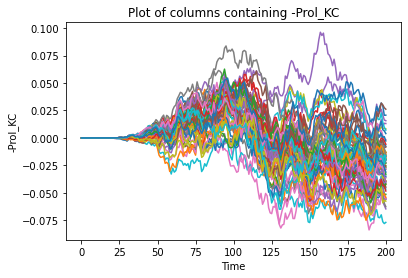

In [12]:
def plot_node_columns(df, node):
    node_cols = [col for col in all_res.columns if node in col and 'Dev' in col and 'Prol_KC-' not in col]
    ax = df[node_cols].plot()
    plt.xlabel('Time')
    plt.ylabel(node)
    plt.title('Plot of columns containing ' + node)
    ax.legend().remove()
    plt.show()


plot_node_columns(all_res, "-Prol_KC")

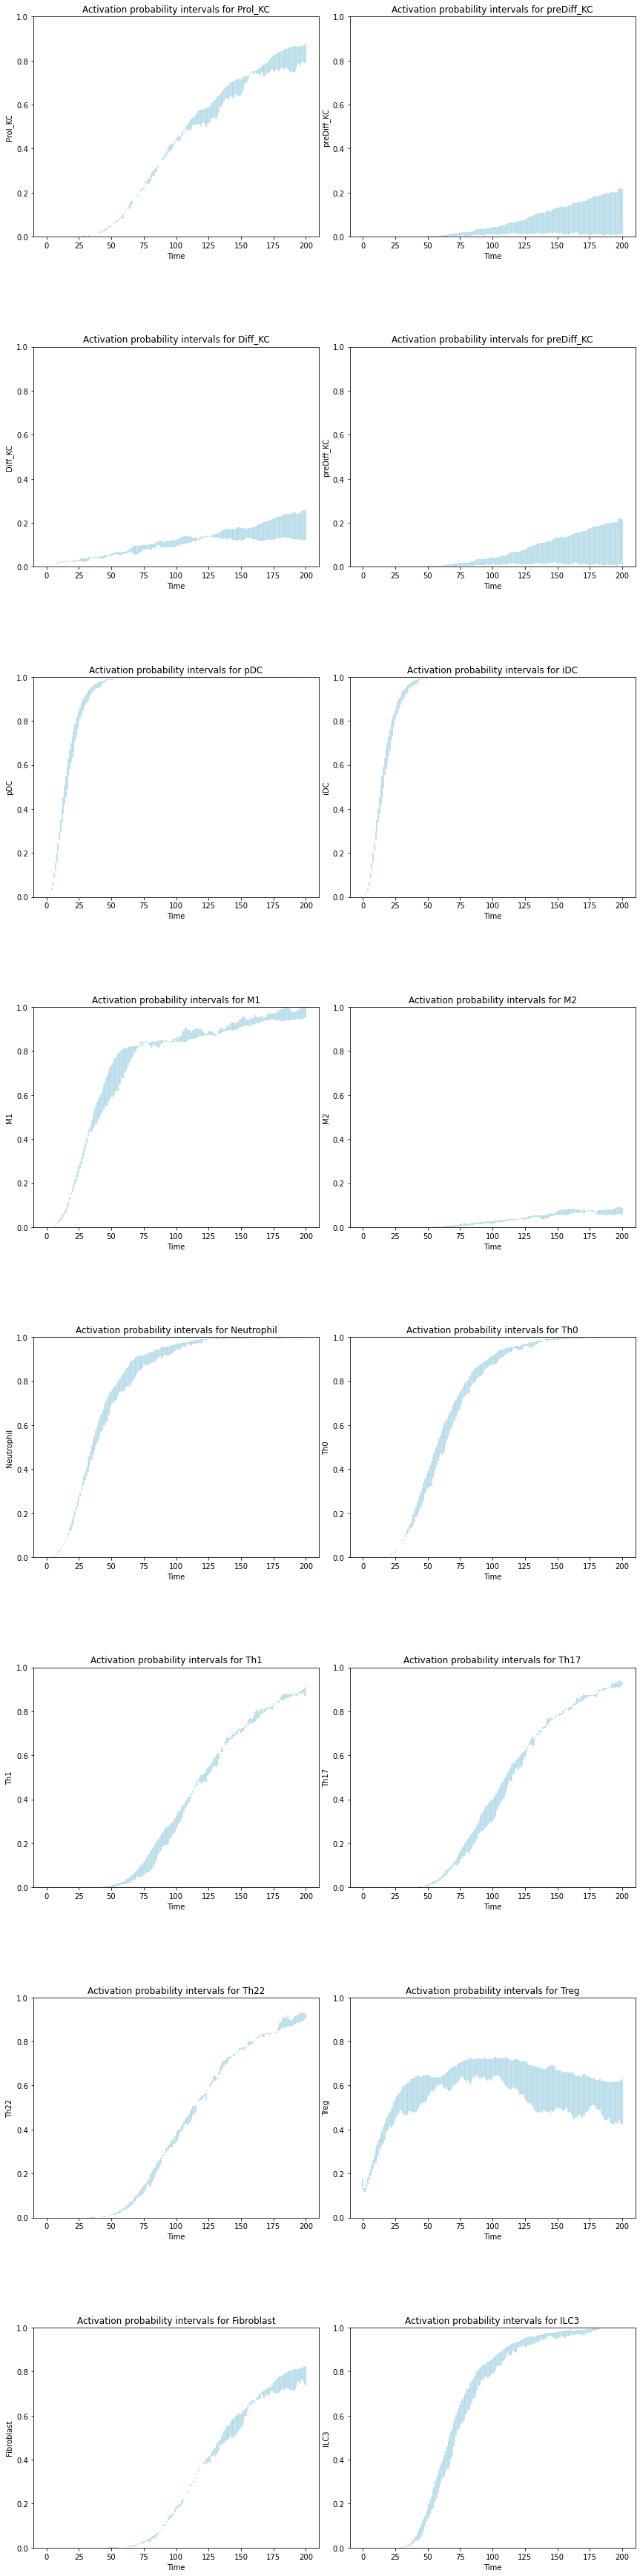

In [30]:
nodes = ['Prol_KC','preDiff_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th17', 'Th22', 'Treg', 'Fibroblast', 'ILC3']

def plot_WT_dev(df, nodes,output_dir):
    num_plots = len(nodes)
    num_rows = math.ceil(num_plots / 2)
    
    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    fig.tight_layout()

    for i, node in enumerate(nodes):
        row = i // 2
        col = i % 2
        
        untreated_col = 'Untreated-' + node
        diff_cols = [col for col in df.columns if col.startswith('Dev-') and col.endswith(node)]
        
        row_mins = df[diff_cols].min(axis=1)
        row_maxes = df[diff_cols].max(axis=1)
        
        ax = axs[row, col]
        ax.errorbar(df.index, df[untreated_col], yerr=[row_mins, row_maxes], fmt='none', ecolor='lightblue')
        ax.set_xlabel('Time')
        ax.set_ylabel(node)
        ax.set_ylim(0, 1)
        ax.set_title('Activation probability intervals for ' + node)

    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

    # Save the combined plot to a PNG file
    plt.savefig(output_dir)
    plt.show()

# Define the nodes and output directory
output_directory = "output/Figures"

# Create the output directory if it doesn't exist
plot_WT_dev(all_res,nodes,output_directory)

## Prolifating KCs

In [14]:
all_res

output/Sensitivity_analysis/$u_FOXP3-PopRatio  \
0                                         1.000000   
1                                         1.000002   
2                                         1.000002   
3                                         1.000003   
4                                         1.000007   
..                                             ...   
196                                       1.193280   
197                                       1.195348   
198                                       1.197143   
199                                       1.199373   
200                                       1.202997   

     output/Sensitivity_analysis/$u_FOXP3-Diff_KC  \
0                                        0.000526   
1                                        0.001358   
2                                        0.002977   
3                                        0.003305   
4                                        0.003678   
..                                            ...   
196                                      0.085840   
197                                      0.083066   
198                                      0.081510   
199                                      0.082349   
200                                      0.086733   

     output/Sensitivity_analysis/$u_FOXP3-Fibroblast  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.000000   
4                                           0.000000   
..                                               ...   
196                                         0.690615   
197                                         0.693285   
198                                         0.703844   
199                                         0.706177   
200                                         0.711042   

     output/Sensitivity_analysis/$u_FOXP3-ILC3  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.000000   
4                                     0.000000   
..                                         ...   
196                                   0.989008   
197                                   0.988810   
198                                   0.989003   
199                                   0.989430   
200                                   0.989760   

     output/Sensitivity_analysis/$u_FOXP3-M1  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.000066   
4                                   0.000292   
..                                       ...   
196                                 0.891026   
197                                 0.896810   
198                                 0.899457   
199                                 0.900409   
200                                 0.902273   

     output/Sensitivity_analysis/$u_FOXP3-M2  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.000000   
4                                   0.000000   
..                                       ...   
196                                 0.046045   
197                                 0.042412   
198                                 0.040671   
199                                 0.041098   
200                                 0.039807   

     output/Sensitivity_analysis/$u_FOXP3-Neutrophil  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.000169   
4          

In [15]:
# Filter columns
pop_ratio_cols = [col for col in all_res.columns if 'PopRatio' in col and 'Diff' not in col]
prol_kc_cols = [col for col in all_res.columns if 'Prol_KC' in col and 'Diff' not in col]

# Multiply columns
for prefix in set(col.split('-')[0] for col in pop_ratio_cols + prol_kc_cols):
    pop_ratio_col = f"{prefix}-PopRatio"
    prol_kc_col = f"{prefix}-Prol_KC"
    all_res[f"{prefix}-Product"] = all_res[pop_ratio_col] * all_res[prol_kc_col]

# View resulting dataframe
print(all_res)


KeyError: 'Dev-PopRatio'

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

def plot_all_errorbars(df, nodes):
        # extract relevant columns
    untreated_col = 'Untreated-Product'
    diff_cols = [col for col in df.columns if col.endswith('Product')]
    
    # get the min and max values for each row
    row_mins = df[diff_cols].min(axis=1)
    row_maxes = df[diff_cols].max(axis=1)

    # plot the error bars only
    fig, ax = plt.subplots()
    ax.errorbar(df.index, df[untreated_col], yerr=[row_mins, row_maxes], fmt='none', ecolor='r')
    ax.set_xlabel('Time')
    ax.set_ylabel(node)
  #  ax.set_ylim(0,1.1)
    ax.set_title('Error bars of ' + node)
    plt.show()
    
for node in nodes:
    plot_all_errorbars(all_res,node)